# The Game of Life

In this notebook, we want to simulate the Game of Life

## A few informations about JuPyteR

### You can use maths in the LaTeX way

Math in text $\alpha = 5$ is possible as well as standalone:

$$
\Psi = \int_{0}^{\infty} \omega(t)dt
$$


### You can use many environments

* list
* list


1. numbered list
2. tada


### Stuff from Internet

![](https://upload.wikimedia.org/wikipedia/commons/d/d8/Game_of_life_U.gif)


## Game of Life

Documentation about GoL is available [here on wikipedia](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life)

The rule of the game is:

* Cells can be either dead (0) or alive (1)
* At every step, there is are two rules:
    * A birth rule: a dead cell becomes alive if it has 3 living neigbors
    * A survival rule! a living cell stays alive if it has 2 or 3 living neighbors
    
The rule can be summarized as `B3S23`    

In [88]:
# Matplotlib "notebook" backend is an interactive backend for notebooks
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import numba

## Let's code the GoL

### First, we need to compute the Moore neighbors

![](https://upload.wikimedia.org/wikipedia/commons/4/4d/Moore_neighborhood_with_cardinal_directions.svg)

In [20]:
# Starting cells
cells = np.random.randint(2, size=(10, 10))
cells

array([[1, 1, 0, 1, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 0, 1, 1, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0, 0, 1, 0, 1, 1],
       [0, 0, 1, 1, 0, 0, 1, 1, 0, 0],
       [0, 1, 0, 0, 0, 1, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 1, 0, 0, 1],
       [0, 0, 1, 0, 1, 1, 1, 1, 1, 1],
       [0, 1, 0, 1, 1, 1, 0, 0, 0, 1]])

In [89]:
@numba.jit()
def count_neighbors(cells):
    """
    Counts the Moore neighbors of the cell matrix
    
    Inputs:
    * cells: NxM array-like
    
    Returns:
    * neighbors: NxM array-like 
    """
    Nr, Nc = cells.shape # Number of rows and columns
    neighbors = np.zeros_like(cells) # A matrix with the same shape and datatype as cells
    for r in range(Nr): # Loop on row
        for c in range(Nc) : # Loop over columns
            neighbors[r,c] = cells[max(0,r-1) : min(r+2, Nr), 
                                   max(0,c-1) : min(c+2, Nc)].sum() - cells[r, c] 

    return neighbors

count_neighbors(cells)

array([[2, 2, 3, 1, 4, 2, 4, 2, 2, 1],
       [4, 3, 4, 2, 4, 4, 7, 5, 6, 3],
       [2, 2, 3, 2, 3, 4, 5, 5, 5, 3],
       [1, 3, 3, 3, 2, 4, 5, 7, 5, 3],
       [1, 3, 3, 2, 2, 4, 4, 5, 4, 3],
       [2, 2, 5, 3, 3, 2, 3, 4, 1, 1],
       [3, 2, 3, 0, 3, 4, 4, 3, 2, 2],
       [1, 3, 3, 3, 4, 4, 4, 4, 4, 2],
       [2, 3, 2, 4, 5, 6, 5, 3, 4, 3],
       [1, 1, 3, 3, 4, 4, 4, 3, 4, 2]])

In [90]:
# Let's have a look at the speed of our function
bigcells = np.random.randint(2, size=(200, 200))
%timeit count_neighbors(bigcells)

1.76 ms ± 86.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Apply the rule of GoL

In [112]:
B = [3] # Birth rule
S = [2,3,5,7] # Survival rule
neigh = count_neighbors(cells)
def apply_rule(cells, B = [3], S = [2,3]):
    """
    Applies the life-like rule.
    """
    neighbors = count_neighbors(cells)
    return ((np.isin(neighbors, S) & (cells == 1)) | 
            (np.isin(neighbors, B) & (cells == 0)) ) * 1  # Logical and = &, logical or = | 

new_cells = apply_rule(cells) 
new_cells

array([[1, 1, 1, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 1, 0, 0, 0, 0, 1],
       [0, 1, 1, 1, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 1, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 0, 1, 0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 1, 1, 0, 0, 0, 1, 0, 1]])

In [113]:
%timeit apply_rule(bigcells) 

2.03 ms ± 8.66 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Create a class to manage the game

In [140]:
class GameOfLife:
    """
    A class to play game of life
    """
    def __init__(self, cells, B = [3], S = [2,3]):
        self.cells = cells
        self.B = B
        self.S = S
        
    def count_neighbors(self):
        """
        Returns the neighbor matrix of the current cells.
        """
        return count_neighbors(self.cells)
    
    def play(self):
        """
        Plays one turn.
        """
        self.cells = apply_rule(self.cells, self.B, self.S)
        
        

gol = GameOfLife(cells)
gol.cells

array([[1, 1, 0, 1, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 0, 1, 1, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0, 0, 1, 0, 1, 1],
       [0, 0, 1, 1, 0, 0, 1, 1, 0, 0],
       [0, 1, 0, 0, 0, 1, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 1, 0, 0, 1],
       [0, 0, 1, 0, 1, 1, 1, 1, 1, 1],
       [0, 1, 0, 1, 1, 1, 0, 0, 0, 1]])

In [141]:
gol.play()
gol.cells

array([[1, 1, 1, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 1, 0, 0, 0, 0, 1],
       [0, 1, 1, 1, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 1, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 0, 1, 0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 1, 1, 0, 0, 0, 1, 0, 1]])

In [122]:
class Vector:
    def __init__(self, x = 0., y = 0., z = 0.):
        self._x = x
        self._y = y
        self._z = z
     
    def norm(self):
        x, y, z = self._x, self._y, self._z
        return (x**2 + y**2 + z**2)**.5

v = Vector(1,2,1)
v._x # An attribute
v.norm()
        

2.449489742783178

In [135]:
class Vector2:
    def __init__(self, coords):
        self.coords = np.array(coords).reshape(3)
        
    def norm(self):
        x, y, z = self.coords
        return (x**2 + y**2 + z**2)**.5

v = Vector2( [1,2,3.])
v.norm()

3.7416573867739413

## Animated the GoL

<IPython.core.display.Javascript object>


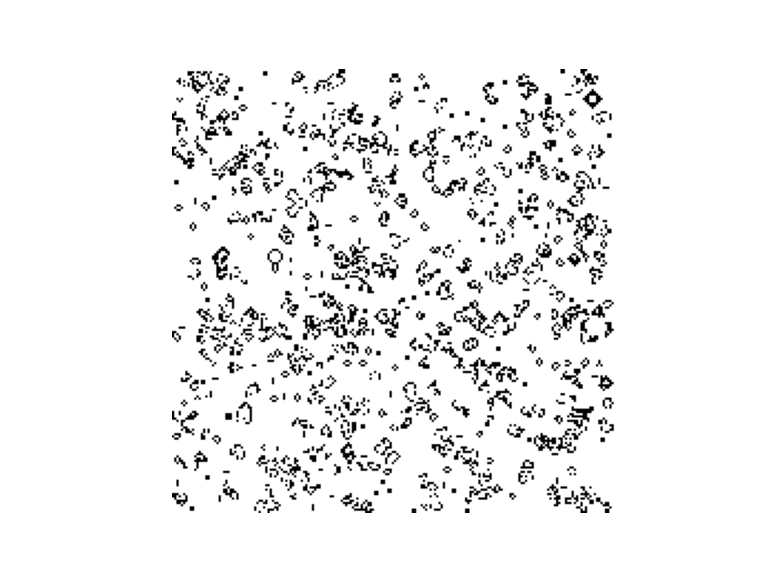

interactive(children=(Checkbox(value=False, description='B1'), Checkbox(value=False, description='B2'), Checkb…

In [201]:
from matplotlib import animation, cm
import ipywidgets as ipw


cells = np.random.randint(2, size = (200,200))
gol = GameOfLife(cells, B= [1,2,4], S = [1,2,3])

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.axis("off")
im = plt.imshow(gol.cells, cmap = cm.binary)
#plt.colorbar()

plt.show()

@ipw.interact(B1 = False, B2 = False, B3 = True, 
              B4 = False, B5 = False, B6 = False, 
              B7= False, B8 = False,
              S1 = False, S2 = True, S3 = True, 
              S4 = False, S5 = False, S6 = False, 
              S7= False, S8 = False,)
def gui(B1, B2, B3, B4, B5, B6, B7, B8, S1, S2, S3, S4, S5, S6, S7, S8):
    B = np.where([B1, B2, B3, B4, B5, B6, B7, B8])[0]+1
    S = np.where([S1, S2, S3, S4, S5, S6, S7, S8])[0]+1
    gol.B = B
    gol.S = S

def update(*args, **kwargs):
    gol.play()
    im.set_array(gol.cells)
    return im,
anim = animation.FuncAnimation(fig, update, blit = True, interval = 50)

In [159]:
def func(a, b, c, d):
    return a+b+c+d

In [160]:
values = 1,2
values

kwvalues = {"c":32, "d":-5}
kwvalues["c"]

32

In [161]:
func(*values, **kwvalues)

30

In [162]:
def func2(a = 0, b = 0, *args, **kwargs):
    print(a, b, args, kwargs)
    return a+b


In [165]:
func2(1,2,4, delta = 5)

1 2 (4,) {'delta': 5}


3

In [192]:
inputs = [False, False, True]
np.where(inputs)[0]+1

array([3])